# SeisSol 3D dynamic rupture training example: the 2016 Mw 7.8 Kaikōura, New Zealand earthquake

This is a scaled-down version of the complex 3D dynamic rupture model published in [Ulrich et al., Nat. Comms., 2019](https://www.nature.com/articles/s41467-019-09125-w).

All files to reproduce the published high-resolution model are openly available at [zenodo](https://zenodo.org/record/2538024#.Yu948S8RphA).

The dynamic rupture earthquake scenario, reproduces key characteristics of the earthquake and constraints puzzling features inferred from high-quality observations including a large gap separating surface rupture traces, the possibility of significant slip on the subduction interface, the non-rupture of the Hope fault, and slow apparent rupture speed. This model shows that the observed rupture cascade is dynamically consistent with regional stress estimates and a crustal fault network geometry inferred from seismic and geodetic data. Our model proposes that the complex fault system operates at low apparent friction thanks to the combined effects of overpressurized fluids, low dynamic friction and stress concentrations induced by deep fault creep.
![](../../kaikoura/Kaikoura_Fig1.png)
*Fault network geometry prescribed for dynamic earthquake rupture modeling. Colors on fault surfaces indicate dipping angle (dip), highlighting the flattening with depth of the Jordan Thrust, Kekerengu, and Needles faults. All segments dip westwards, except for the Humps Fault Zone. The Hope, Culverden, and Leonard Mound faults, dipping, respectively, 70° toward NorthWest, 70° toward South, and 50° toward SouthEast, are displayed in yellow. These faults do not rupture in our dynamic rupture model. Also shown are the high-resolution topography and bathymetry (Mitchell et al., 2012), and S-wave speeds (Vs) on four cross-sections of the 3D subsurface structure (Eberhart-Phillips et al., 2010) incorporated in the model.*


## Mesh

To build 3D models with complicated geometries that are beyond the capabilities of gmsh we are using [SimModeler](http://www.simmetrix.com/index.php/simmodeler/overview), a software that is free for academic use. 
The necessary mesh generation steps include:
1. CAD 1: Creating a high-resolution topography and bathymetry which represent the model's free surface. Merging it with a simple 3D volume (e.g. a box);
2. CAD 2: Creating the complex fault network constrained by fault traces and varying fault dip and intersect all faults with each other and with topo-bathymetry in a manifold manner;
3. Mesh: Automatic volumetric meshing using unstructured tetrahedral elements. Keep in mind our two differing resolution criteria: the CFL criterion determines the required resolution for seismic wave propagation, and the dynamic rupture process zone/cohesive zone size, the region behind the rupture front where the fault strength drops from its static to dynamic level ([Day et al., 2005](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2005jb003813); for SeisSol: [Wollherr et al., 2018](https://academic.oup.com/gji/article/214/3/1556/5017447?login=true)).

![](../../kaikoura/Kaikoura_Fig3.png)
*Snapshot of the wavefield (absolute particle velocity in m/s) across the fault network at a rupture time of 55 s. The high-resolution model is discretized by an unstructured mesh accounting for three-dimensional (3D) subsurface structure and high-resolution topography and featuring refined resolution in the vicinity of the faults. It incorporates the nonlinear interaction between frictional on-fault failure, off-fault plasticity, and seismic wave propagation.*

For this training, we provide a pre-prepared smaller mesh file (approx. 280,000 elements). The prescribed resolution here is 1500 m element edge length everywhere on the faults, and static mesh-coarsening away from the fault system. The published high-resolution mesh, for comparison, consists of 29 million elements, decreasing the shortest element edge lengths to 300 m close to faults, and at most 1000 m close to topography and bathymetry resolving the seismic wavefield at frequencies up to 3 Hz in the source region. The mesh is visible in the figures above, but and you can also visualize the training mesh either using (1) ParaView on your local laptop or (2) use the code snippet below on your local laptop (because rendering with pyvista is currently not supported in the Quakeworx Gateway).

```
import vtk
import pyvista as pv

reader = vtk.vtkXdmfReader()
reader.SetFileName('NZmicro_full1500_small_box_only.xdmf')
reader.Update()
mesh = pv.wrap(reader.GetOutput())
elevation = mesh.elevation(low_point=(0, 0, -800), high_point=(0, 0, 2970))
pv.plot(elevation, cmap='terrain', background='grey', show_edges=False, jupyter_backend='static')
```

## Run Kaikōura setup using the SeisSol App in the Quakeworx Gateway

Now we run SeisSol using the parameter file provided in the Quakework Kaikoura training directory. We handle the 3D heterogeneous subsurface velocity data set using [ASAGI](https://seissol.readthedocs.io/en/latest/asagi.html), our open-source software for efficient reading, interpolation, and writing of parallel, adaptive geoinformation ([Rettenberger et al., 2016](http://dl.acm.org/citation.cfm?id=2938618)).

The training example uses linear slip-weakening friction for efficiency reasons. Our published high-resolution model features fast velocity-weakening rate-and-state friction ([Dunham et al. 2011](https://pubs.geoscienceworld.org/ssa/bssa/article/101/5/2296/326473/Earthquake-Ruptures-with-Strongly-Rate-Weakening)), and slightly different loading/strength parametrisations. SeisSol with rate and state friction will run fast if compiled with a commercial compiler such as intel, as available on most clusters.

## Visualization

We now visualize what we call the fault output generated by SeisSol. These are the modeled fields across the complex fault surfaces. Note that generating this output includes interpolation, since SeisSol is solving the governing PDEs in their weak form. We can visualise all processes occurring across the fault surface during dynamic rupture, e.g. slip rates, slip, shear and normal stresses, effective friction etc.

This is how the published high-resolution rupture looks like:
![](../../kaikoura/Kaikoura_Fig2.png)
*Overview of the simulated rupture propagation. Snapshots of the absolute slip rate are shown every 5 s. The figure focuses on four different portions of the fault system, following the rupture front as it propagates from South to North. Labels indicate remarkable dynamic features of the rupture.*

![](../../kaikoura/Kaikoura_Fig4.png)
*Source properties of the published dynamic rupture model and comparison to observational inferences. Final slip magnitude a) modeled here and b) inferred by Xu et al., 2018. Final rake angle c) modeled and d) inferred by Xu et al., 2018, e) Modeled rupture velocity. f) Modeled moment rate function compared with those inferred by Bai et al., 2017, from teleseismic and tsunami data, by Zhang et al., 2017, from seismic waveform inversion and from teleseismic data by the SCARDEC method, Vallee et al., 2011.*

Check out the [documentation](https://seissol.readthedocs.io/en/latest/fault-output.html#outputmask) for an explanation of the variable names and change 'SRs' to other quantities of interest.

In [1]:
!pip install seissolxdmf
import sys
sys.path.append("/home/qwxdev/.local/lib/python3.12/site-packages")

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# For common data processing
import numpy as np

# For visualization in 2D and 3D SeisSol mesh
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors

# Dedicated library for post-processing HDF5 format SeisSol output
import seissolxdmf as seisx

We have to set the path to the simulation outputs, which depends on the name you chose in the Gateway.

**Please use your job name here.**

In [3]:
# Asssuming you job name was "SeisSol_Kaikoura"
folder = "SeisSol_Kaikoura"

In [4]:
# Load data
xdmfFilename = "../../../{}/outputs/NZ_LSW-fault.xdmf".format(folder) 
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt() - 1 #sx.ReadNdt() provides the total number of time steps that have been written out
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()

In [5]:
ndt = 23
## Here you can load the physical field that  you want to visualize. We list some of the variables that are often needed.
## More can be found here: https://seissol.readthedocs.io/en/latest/fault-output.html
## SRs and SRd: Slip rates in along-strike and along-dip directions
## T_s, T_d: Shear stress in strike and dip directions, P_n: Normal stress
variable1 = sx.ReadData('SRs', ndt) #SRs
variable2 = sx.ReadData('ASl', ndt)

# Define the colormap ranges
variable1_vmin, variable1_vmax = np.min(variable1), np.max(variable1)
variable1_norm = mcolors.Normalize(vmin=variable1_vmin, vmax=variable1_vmax)
variable2_vmin, variable2_vmax = np.min(variable2), np.max(variable2)
variable2_norm = mcolors.Normalize(vmin=variable2_vmin, vmax=variable2_vmax)

In [6]:
plt.rcParams['font.size'] = 18

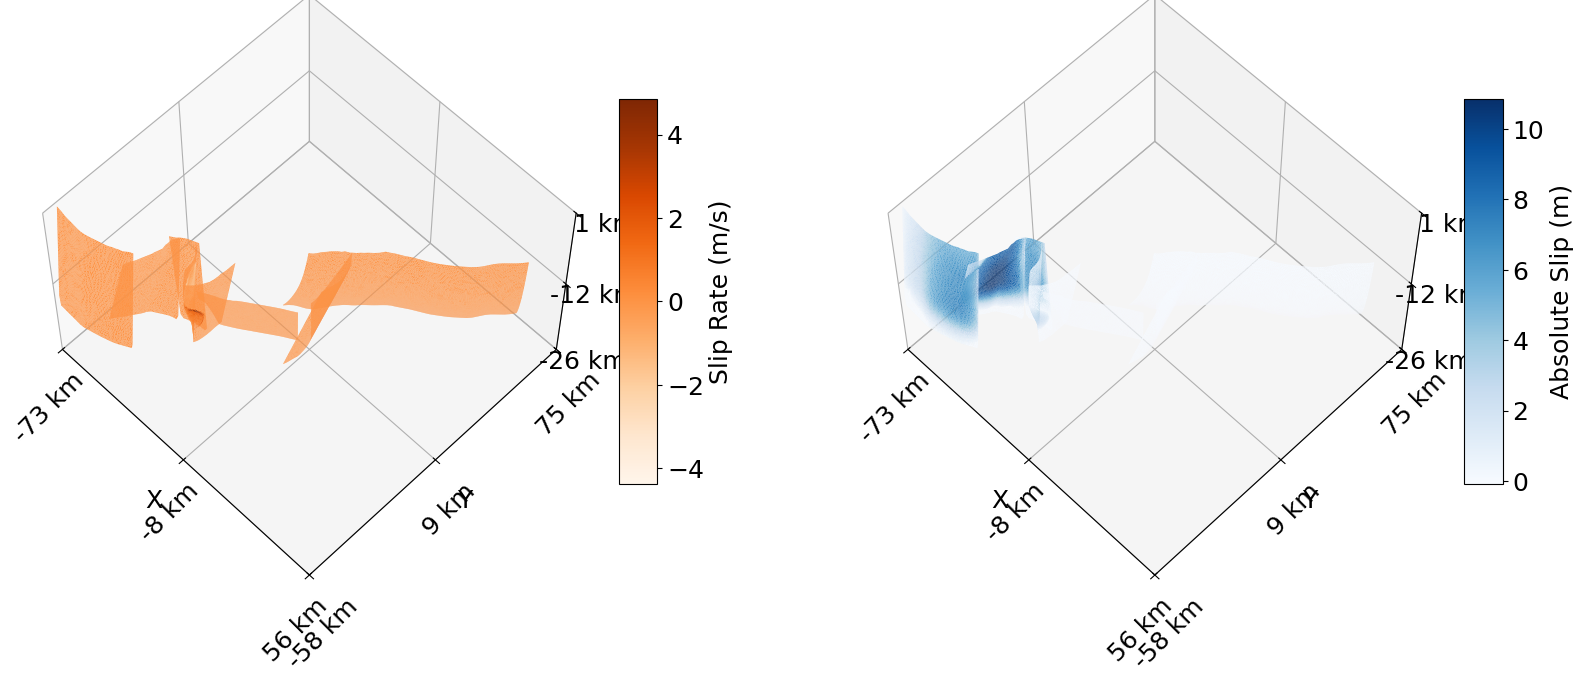

In [7]:
# Extract vertices for each triangular face in the mesh
triangles = [xyz[connect[i]] for i in range(connect.shape[0])]

# Prepare data for the triangles
verts = [tri for tri in triangles]
variable1_colors = [plt.cm.Oranges(variable1_norm(np.mean(variable1[i]))) for i in range(len(verts))]
variable2_colors = [plt.cm.Blues(variable2_norm(np.mean(variable2[i]))) for i in range(len(verts))]

# Create subplots
fig = plt.figure(figsize=(20, 10))

x_ticks = np.linspace(np.min(xyz[:, 0]), np.max(xyz[:, 0]), 3)
y_ticks = np.linspace(np.min(xyz[:, 1]), np.max(xyz[:, 1]), 3)
z_ticks = np.linspace(np.min(xyz[:, 2]), np.max(xyz[:, 2]), 3)

# First subplot: Slip Rate
ax1 = fig.add_subplot(121, projection='3d')
variable1_collection = Poly3DCollection(verts, alpha=1.0, facecolor=variable1_colors)
ax1.add_collection3d(variable1_collection)
ax1.set_xlim(np.min(xyz[:, 0]), np.max(xyz[:, 0]))
ax1.set_ylim(np.min(xyz[:, 1]), np.max(xyz[:, 1]))
ax1.set_zlim(-20e3, 0)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)
ax1.set_zticks(z_ticks)
ax1.set_xticklabels([f"{tick/1000:.0f} km" for tick in x_ticks], rotation=45)
ax1.set_yticklabels([f"{tick/1000:.0f} km" for tick in y_ticks], rotation=45)
ax1.set_zticklabels([f"{tick/1000:.0f} km" for tick in z_ticks])

sm1 = plt.cm.ScalarMappable(cmap='Oranges', norm=variable1_norm)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax1, shrink=0.5, aspect=10)
cbar1.set_label('Slip Rate (m/s)')

# Second subplot: Damage
ax2 = fig.add_subplot(122, projection='3d')
variable2_collection = Poly3DCollection(verts, alpha=1.0, facecolor=variable2_colors)
ax2.add_collection3d(variable2_collection)
ax2.set_xlim(np.min(xyz[:, 0]), np.max(xyz[:, 0]))
ax2.set_ylim(np.min(xyz[:, 1]), np.max(xyz[:, 1]))
ax2.set_zlim(-20e3, 0)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xticks(x_ticks)
ax2.set_yticks(y_ticks)
ax2.set_zticks(z_ticks)
ax2.set_xticklabels([f"{tick/1000:.0f} km" for tick in x_ticks], rotation=45)
ax2.set_yticklabels([f"{tick/1000:.0f} km" for tick in y_ticks], rotation=45)
ax2.set_zticklabels([f"{tick/1000:.0f} km" for tick in z_ticks])

sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=variable2_norm)
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax2, shrink=0.5, aspect=10)
cbar2.set_label('Absolute Slip (m)')

# Adjust view angles
ax1.view_init(elev=60, azim=-45) 
ax2.view_init(elev=60, azim=-45)

#plt.tight_layout()
plt.show()

### Exercises

* Change the view angles to look at the fault output from different perspectives.
* Change the time step (ndt) to look at the slip evolution and slip rates at different instances.

The fault output, as well as all other surface and volume outputs, can be written [asynchronously](https://seissol.readthedocs.io/en/latest/environment-variables.html#asynchronous-output), i.e. specific threads or nodes can be dedicated to write these outputs.

Next, we visualize SeisSol's so called [free surface output](https://seissol.readthedocs.io/en/latest/free-surface-output.html). Fields *v1, v2, v3* are the particle velocities and *u1, u2, u3* are the displacements in *x, y, z* direction, respectively, evaluated everywhere at the free surface. 

The writer outputs additionally a quantity called “locationFlag”, which has the values 0 and 1 when at the elastic or acoustic side of an elastic-acoustic interface (as used in [Krenz et al., 21](https://arxiv.org/abs/2107.06640)). In this manner, we can distinguish between both sides of the interface even though they have the same coordinates. In our case it has the value 2 for an ordinary free surface boundary condition.

In [8]:
def plot_displacement(xdmfFilename,timestep):
    
    sx = seisx.seissolxdmf(xdmfFilename) # initiate class
    xyz = sx.ReadGeometry() # load geometry array as a numpy array of shape
    connect = sx.ReadConnect() # load connectivity array as a numpy array of shape
    U = sx.ReadData("u3", timestep) # u3 is the vertical displacement
    print(min(U), max(U))
    
    x, y = xyz[:,0], xyz[:,1]
    plt.tripcolor(x, y, connect, facecolors=U, cmap="seismic", rasterized=True, vmin=-2, vmax=2)
    plt.xlabel("Easting")
    plt.ylabel("Northing")
    cbar = plt.colorbar(orientation="horizontal", label="Displacement [m]")

-1.0020718143974663 6.002903781080946


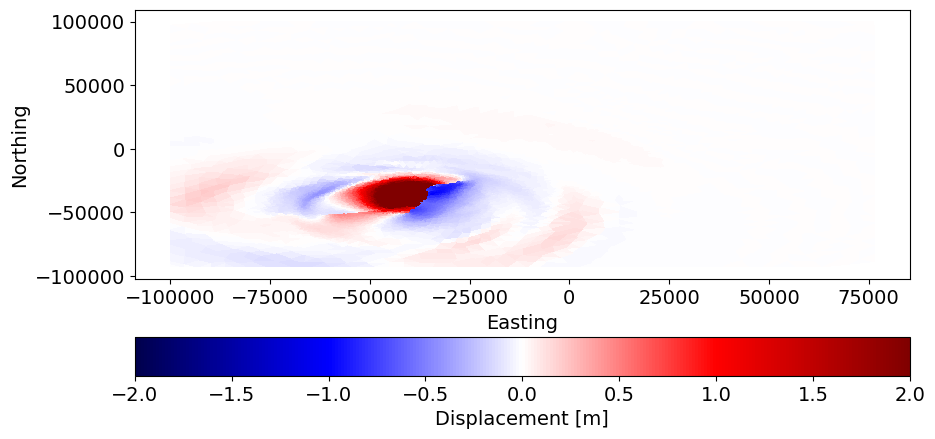

In [9]:
xdmfFilename = "../../../{}/outputs/NZ_LSW-surface.xdmf".format(folder)

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.rcParams['font.size'] = 14
ax1 = plt.gca()
time = 4 # last time step
plot_displacement(xdmfFilename,time)

### Effect of initial loading on cascading rupture dynamics
**Task:** Change the stress shape ratio (s2ratio) from 0.15 to 0.27 and  and run the updated setup to observe the much delayed dynamic triggering of the second fault. Rename the output folder to compare 3D earthquake dynamics of both setups by opening both fault output files in ParaView. Compare also the wavefield at the free surface in both simulations.